<h1> Data Science in Marketing: Customer Segmentation with Python</h1>

<h2>1. Mempersiapkan Library</h2>

In [1]:
# Mempersiapkan Library
import pandas as pd # library yang digunakan untuk melakukan pemrosesan analisi data
import matplotlib.pyplot as plt # Library yang digunakan untuk visualisasi data
import seaborn as sns # Library diatas matplotlib yang digunakan untuk visualisasi data
import pickle # Library yang digunakan untuk menyimpan model
from sklearn.preprocessing import LabelEncoder # Library yang digunakan untuk encoding label
from kmodes.kmodes import KModes # Library yang digunakan untuk clustering
from kmodes.kprototypes import KPrototypes # Library yang digunakan untuk clustering
from pathlib import Path # Library yang digunakan untuk path file

<h2>2. Membaca Data Pelanggan</h2>

In [2]:
# Membaca dataset
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/customer_segments.txt', sep='\t')

# Menampilkan 5 data teratas
display(df.head())

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


<h2>3. Melihat Informasi dari Data</h2>

In [3]:
# Menampilkan informasi dataset
print(f"Informasi Dataset : \n")
print(df.info())

Informasi Dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB
None


<h2>4. Kesimpulan: Informasi Dasar Data</h2>
<ul>
  <li>Data yang akan digunakan terdiri dari 50 baris dan 7 kolom</li>
  <li>Tidak ada null value</li>
  <li>2 kolom tipe numeric 5 kolom tipe string</li>
</ul>

<h2>5. Melakukan Eksplorasi Data</h2>

<h2>6. Eksplorasi Data Numerik</h2>

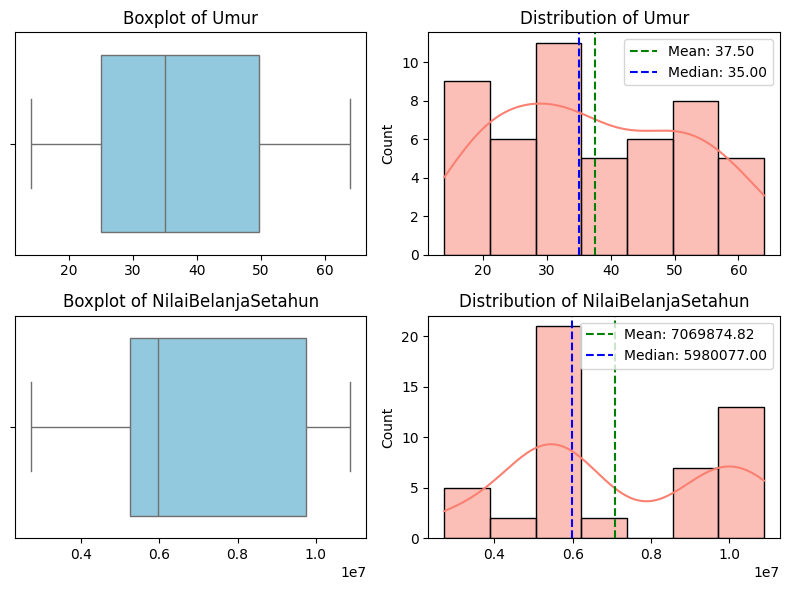

In [4]:
# Fungsi untuk membuat plot
def observasi_num(features):
       
    # Buat subplot
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))
    
    # Loop melalui setiap fitur
    for i, kol in enumerate(features):
        # Boxplot
        sns.boxplot(x=df[kol], ax=axs[i, 0], color='skyblue')
        axs[i, 0].set_title(f'Boxplot of {kol}', fontsize=12)
        axs[i, 0].set_xlabel('')
        
        # Histogram dengan KDE
        sns.histplot(df[kol], kde=True, ax=axs[i, 1], color='salmon')
        axs[i, 1].set_title(f'Distribution of {kol}', fontsize=12)
        axs[i, 1].set_xlabel('')
        
        # Tambahkan informasi statistik
        mean_val = df[kol].mean()
        median_val = df[kol].median()
        axs[i, 1].axvline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axs[i, 1].axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.2f}')
        axs[i, 1].legend()
    
    # Atur layout
    plt.tight_layout()
    plt.show()

# Memanggil fungsi observasi_num
observasi_num(['Umur','NilaiBelanjaSetahun'])

<h3>Ringkasan Observasi Data Numerik</h3>
<h4><strong>1. Umur</strong></h4>
<ol>
  <li>Distribusi umur pelanggan cenderung normal dengan sedikit kemiringan ke kanan (right-skewed)</li>
  <li>Sebagian besar pelanggan berumur 20-50 tahun</li>
  <li>Tidak ada outlier signifikan</li>
</ol>
<h4><strong>2. Nilai Belanja Setahun</strong></h4>
<ol>
  <li>Distribusi nilai belanja setahun pelanggan memiliki kemiringan ke kanan (right-skewed) itu artinya ada beberapa pelanggan dengan nilai belanja yang sangat tinggi</li>
  <li>Sebagian besar pelanggan memiliki nilai belanja setahun bernilai 4.000.000 - 8.000.000</li>
  <li>Ada outlier yang siginifikan artinya ada beberapa pelanggan dengan nilai belanja yang sangat tinggi</li>
</ol>

<h2>7. Eksplorasi Data Kategorikal</h2>

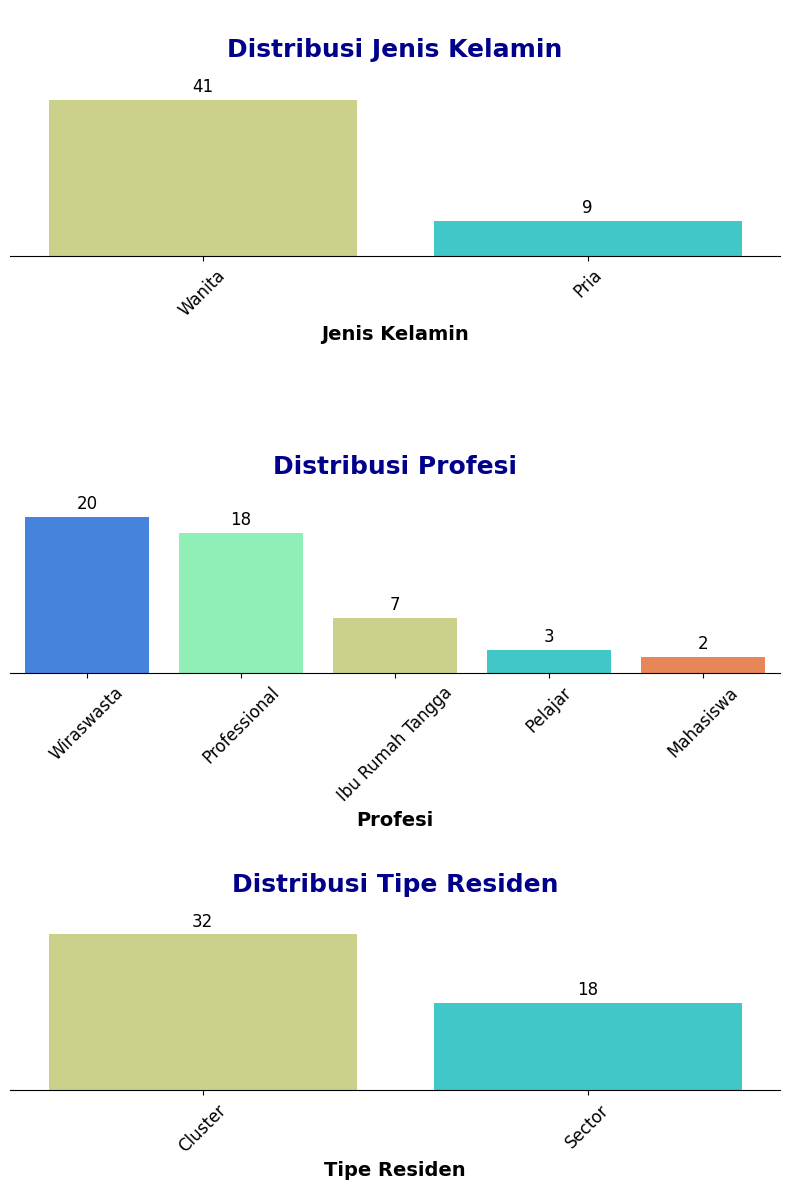

In [5]:
# Menyiapkan Kolo Kategorikal
kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']

# Membuat canvas
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Membuat plot untuk setiap kolom kategorikal
for i, kol in enumerate(kolom_kategorikal):
    # Membuat Plot dengan warna yang lebih menarik
    sns.countplot(data=df, x=kol, hue=kol, order=df[kol].value_counts().index, ax=axs[i], palette='rainbow')
    axs[i].set_title(f'\nDistribusi {kol}\n', fontsize=18, fontweight='bold', color='darkblue')
    axs[i].set_xlabel(kol, fontsize=14, fontweight='bold')
    axs[i].set_ylabel('Count', fontsize=14, fontweight='bold')
    
    # Memberikan anotasi
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center',
                        va='center',
                        xytext=(0, 10),
                        textcoords='offset points',
                        fontsize=12,
                        color='black')

    # Setting Plot
    sns.despine(right=True, top=True, left=True)
    axs[i].axes.yaxis.set_visible(False)
    axs[i].tick_params(axis='x', labelsize=12, rotation=45)  # Rotasi label sumbu x
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid

# Menyesuaikan layout
plt.tight_layout()
plt.show()

<h3>Ringkasan Observasi Data Kategorikal</h3>
<h4><strong>1. Ketidakseimbangan Gender</strong></h4>
<ul>
  <li>Dataset di dominasi oleh Wanita sehingga perlu diperhatikan jika analisis mempertimbangkan gender</li>
</ul>
<h4><strong>2. Profesi Dominan</strong></h4>
<ul>
  <li>Dataset di dominasi oleh profesi Wiraswasta dan Professiional sehingga strategi bisnis atau pemasaran dapat difokuskan pada kelompok ini</li>
</ul>
<h4><strong>3. Preferensi Tempat Tinggal</strong></h4>
<ul>
  <li>Dataset di dominasi oleh Cluster strategi bisnis atau layanana bisnis bisa disesuaikan dengan karakteristik pelanggan yang tinggal di Cluster</li>
</ul>

<h3>Ringkasan Observasi Dataset</h3>
<ul>
  <li>Rata-rata umur pelanggan adalan 37,5 Tahun</li>
  <li>Rata-rata nilai belanja setahun pelanggan adalah Rp. 7.069.874,82</li>
  <li>Jenis kelamin pelanggan didominasi oleh Wanita 41 (82%) sedangan Pria 9 (18%)</li>
  <li>Profesi di dominasi oleh Wiraswasta 20 (40%) Professional 18 (36%) sisanya 24%</li>
  <li>Pelanggan mayoritas tinggal di Cluster 32 (64%) sedangan untuk sector 18 (36%)</li>
</ul>

<h3><strong>Tips !!!</strong></h3>
<p>Kita dapat mengenal data kita lebih jauh lagi pada tahapan eksplorasi data ini. Proses eksplorasi data bisa berupa univariate maupun multivariate data eksplorasi. Eksplorasi Data Univariate melihat karakteristik tiap-tiap feature, misalnya dengan melihat statistik deskriptif, membuat histogram, kdeplot, countplot maupun boxplot. Sedangkan untuk Eksplorasi Data Multivariate, kita melihat hubungan tiap variabel dengan variabel lainnya, misal kan dengan membuat korelasi matrix, melihat predictive power, cross tabulasi, dan lainnya.</p>

<h2>8. Mempersiapkan Data Sebelum Permodelan</h2>
<h3>Syarat - Syarat Clustering Menggunakan Model <strong>K-Prototype</strong></h3>
<ol>
  <li><strong>Data Numerik</strong> memiliki <strong>Skala</strong> yang sama dengan metode <strong>Standarisasi</strong> Data Numerik</li>
  <li><strong>Data Kategorikal</strong> dirubah menjadi <strong>Data Numerik</strong> dengan metode <strong>Encoding</strong></li>
</ol>

<h2>9. Standarisasi Kolom Numerik</h2>
<ul>
  <li>Standarisasi: Proses transformasi data numerik agar memiliki distribusi yang seragam</li>
  <li>StandardScaler: Metode yang digunakan untuk transformasi data numerik agar memiliki distribusi seragam dengan nilai <strong>Mean</strong> = <strong>0</strong> dan <strong>Standar Deviasi</strong> = <strong>1</strong></li>
</ul>

In [6]:
# Library yang digunakan untuk standardisasi
from sklearn.preprocessing import StandardScaler

# Menyiapkan kolom numerik
kolom_numerik = ['Umur','NilaiBelanjaSetahun']

# Menampilkan Statistik Deskriptif Sebelum Dilakukan Standardisasi
print(f"Statistik Deskriptif Sebelum Standardisasi : \n")
display(df.describe().T)

# Inisiasi Standard Scaler
std_scaler = StandardScaler()

# Standardisasi kolom numerik
df_std = std_scaler.fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan Statistik Deskriptif Setelah Dilakukan Standardisasi
print(f"Statistik Deskriptif Setelah Standardisasi : \n")
display(df_std.describe().round(1).T)

# Menampilkan 5 data teratas
print(f"Menampilkan 5 data teratas : \n")
display(df_std.head())

Statistik Deskriptif Sebelum Standardisasi : 



,count,mean,std,min,25%,50%,75%,max
Umur,50.0,37.50,1.467366e+01,14.0,25.00,35.0,49.75,64.0
NilaiBelanjaSetahun,50.0,7069874.82,2.590619e+06,2722700.0,5257529.75,5980077.0,9739615.00,10884508.0


Statistik Deskriptif Setelah Standardisasi : 



,count,mean,std,min,25%,50%,75%,max
Umur,50.0,-0.0,1.0,-1.6,-0.9,-0.2,0.8,1.8
NilaiBelanjaSetahun,50.0,-0.0,1.0,-1.7,-0.7,-0.4,1.0,1.5


Menampilkan 5 data teratas : 



,Umur,NilaiBelanjaSetahun
0,1.411245,0.946763
1,-1.617768,-1.695081
2,0.722833,-0.695414
3,1.067039,-0.727361
4,0.240944,1.382421


<h2>10. Konversi Kategorikal Data dengan Label Encoder</h2>
<ul>
  <li>Konversi Kategorikal: Konversi data berbentuk kategori atau label menjadi bentuk numerik agar dapat diproses oleh algoritma Machine Learning</li>
</ul>

In [7]:
# Library yang digunakan untuk Konversi Categorical ke Numerical
from sklearn.preprocessing import LabelEncoder

# Menyiapkan kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']

# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy()

# Melakukan label encoder untuk semua kolom kategorikal
for i in kolom_kategorikal:
    print(f"Memproses kolom: {i} ...")

    # Menampilkan nilai unik sebelum transformasi
    print(f"Sebelum transformasi : {i} \n")
    print(df_encode[i].unique())

    # Melakukan label encoder
    df_encode[i] = LabelEncoder().fit_transform(df_encode[i])

    # Menampilkan nilai unik setelah encoding
    print(f"Nilai unik setelah encoding: {df_encode[i].unique()}")
    print(f"Kolom {i} telah di-encode.\n")

# Menampilkan 5 data teratas
print(f"Menampilkan 5 data teratas : \n")
display(df_encode.head())

Memproses kolom: Jenis Kelamin ...
Sebelum transformasi : Jenis Kelamin 

['Pria' 'Wanita']
Nilai unik setelah encoding: [0 1]
Kolom Jenis Kelamin telah di-encode.

Memproses kolom: Profesi ...
Sebelum transformasi : Profesi 

['Wiraswasta' 'Pelajar' 'Professional' 'Ibu Rumah Tangga' 'Mahasiswa']
Nilai unik setelah encoding: [4 2 3 0 1]
Kolom Profesi telah di-encode.

Memproses kolom: Tipe Residen ...
Sebelum transformasi : Tipe Residen 

['Sector' 'Cluster']
Nilai unik setelah encoding: [1 0]
Kolom Tipe Residen telah di-encode.

Menampilkan 5 data teratas : 



,Jenis Kelamin,Profesi,Tipe Residen
0,0,4,1
1,1,2,0
2,0,3,0
3,0,3,0
4,1,4,0


<h2>11. Menggabungkan Data Untuk Pemodelan</h2>

In [8]:
# Membuat Dataframe baru hasil Menggabungkan Dataframe Standardized dan Encoded
df_model = pd.concat([df_encode, df_std], axis=1)

# Menampilkan 5 data teratas
display(df_model.head())

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421


<h2>12. Apa itu <strong>Clustering</strong> dan Algoritma <strong>K-Prototype</strong></h2>
<ul>
  <li><strong>Clustering</strong> : Proses pembagian objek - objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara sati objek dengan yang lain</li>
  <li><strong>K-Prototype</strong> = <strong>K-Means</strong> + <strong>K-Modes</strong> --> Integrasi yang komplek</li>
  <li><strong>K-Means</strong> : Algoritma untuk melakukan Clustering <strong>Data Numerik</strong></li>
  <li><strong>K-Modes</strong> : Algoritma untuk melakukan Clustering <strong>Data Kategorikal</strong></li>
  <li><strong>K-Prototype</strong> : Algoritma untuk melakukan Clustering <strong>Data Numerik</strong> & <strong>Data Kategorikal</strong></li>
</ul>

<h2>13. Mencari Jumlah Cluster yang Optimal</h2>
<h4>Metode - metode Untuk Mencari Jumlah Cluster Optimal</h4>
<ol>
  <li><strong>Elbow Method</strong> : </li>
    <ul>
      <li>Menghitung nilai <strong>Cost Function</strong> Within-Cluster-Sum of Errors atau WCSS untuk berbagai jumlah cluster</li>
      <li>Plot nilai cost function terhadap jumlah cluster</li>
      <li>Titik di mana penurunan cost function melambat (membentuk "siku") dianggap sebagai jumlah cluster optimal</li>
    </ul>
    <li><strong>Silhouette Score</strong> : </li>
    <ul>
      <li>Mengukur seberapa baik setiap titik data cocok dengan clusternya sendiri dibandingkan dengan cluster lain</li>
      <li>Nilai Silhouette Score berkisar dari -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan clustering yang lebih baik</li>
      <li>Jumlah cluster optimal adalah yang memiliki Silhouette Score tertinggi</li>
    </ul>
    <li><strong>Davies-Bouldin Index</strong> : </li>
    <ul>
      <li>Mengukur rasio antara jarak dalam cluster dan jarak antar cluste</li>
      <li>Nilai yang lebih rendah menunjukkan clustering yang lebih baik</li>
    </ul>
    <li><strong>Calinski-Harabasz Index</strong> : </li>
    <ul>
      <li>Mengukur rasio antara dispersi antar cluster dan dispersi dalam cluster</li>
      <li>Nilai yang lebih tinggi menunjukkan clustering yang lebih baik</li>
    </ul>
</ol>

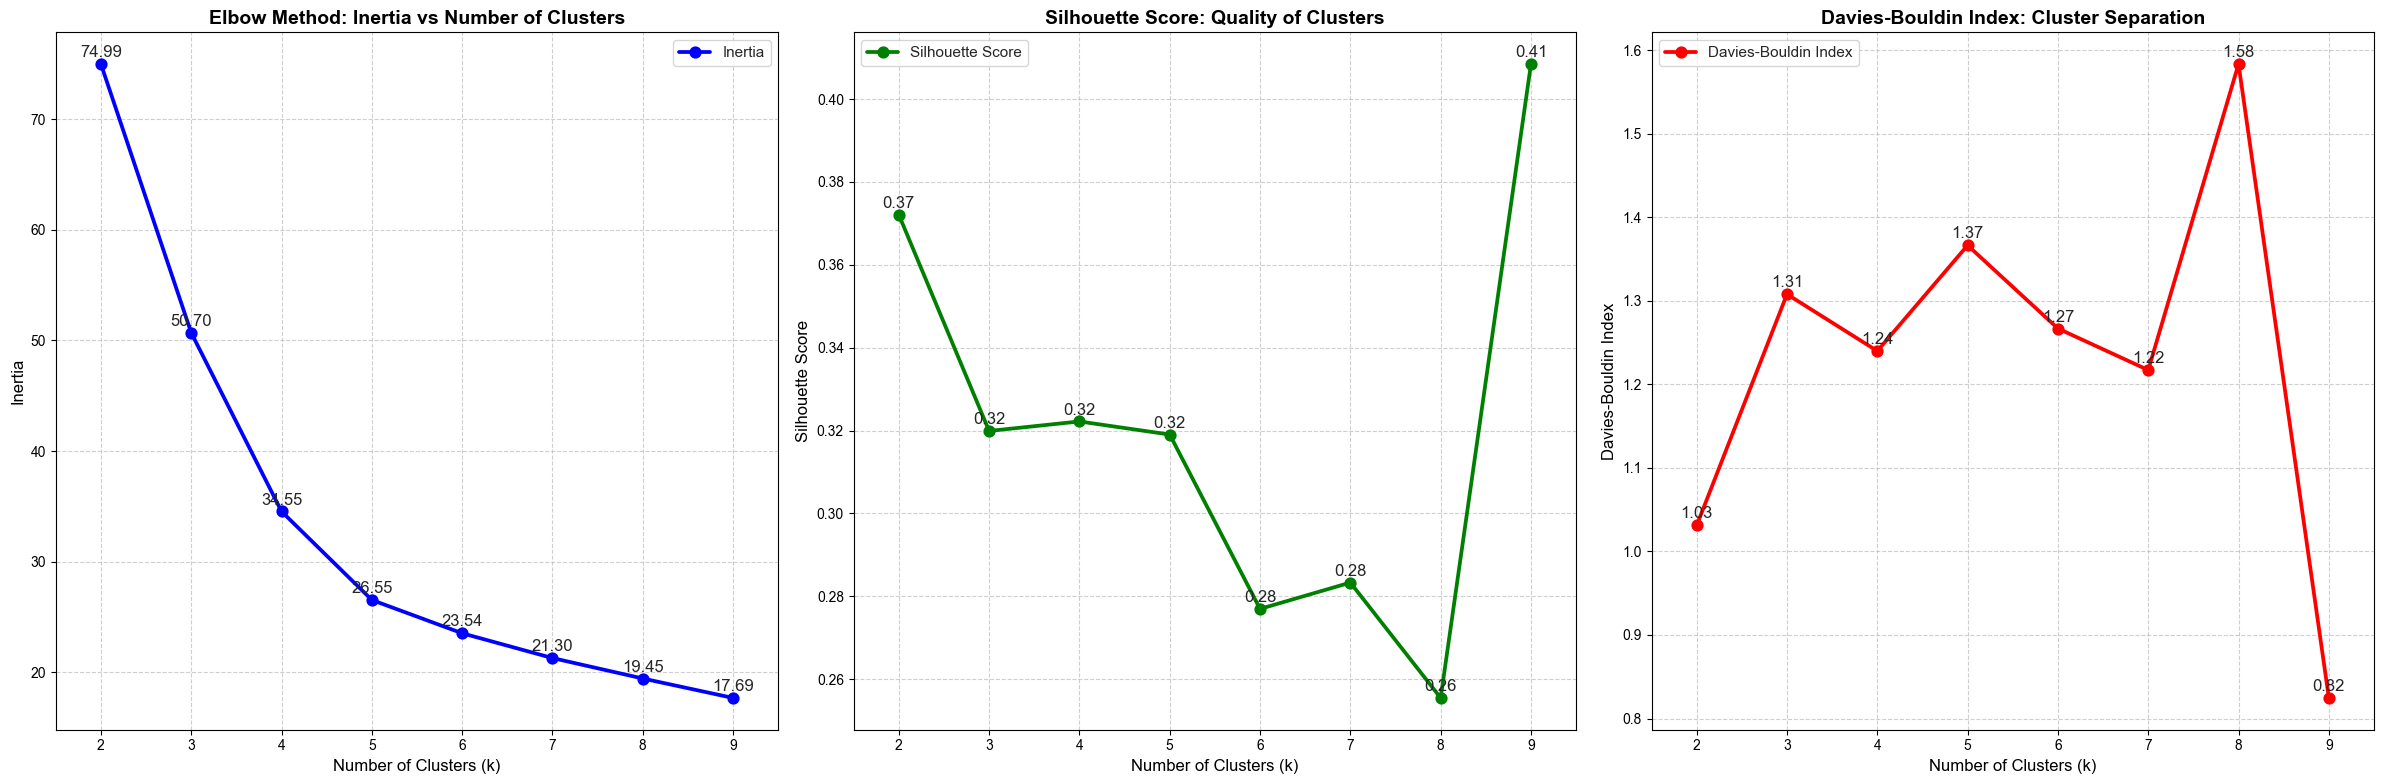

Optimal Clusters (Elbow Method): 5
Optimal Clusters (Silhouette Score): 9
Optimal Clusters (Davies-Bouldin Index): 9


In [9]:
# Library yang digunakan untuk clustering
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Membuat variable kolom_kategorikal
categorical_columns = [0, 1, 2]  # Indeks kolom kategorikal

# Parameter clustering
cluster_range = range(2, 10)  # Jumlah cluster yang diuji

# Menyimpan hasil evaluasi
inertia_values = []
silhouette_scores = []
davies_bouldin_scores = []

for k in cluster_range:
    # Inisialisasi K-Prototypes
    kproto = KPrototypes(n_clusters=k, random_state=42)
    
    # Fit data
    labels = kproto.fit_predict(df_model, categorical=categorical_columns)

    # Simpan inertia
    inertia_values.append(kproto.cost_)

    # Silhouette Score (untuk data campuran, hanya jika k > 1)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_model, labels, metric="euclidean"))
    else:
        silhouette_scores.append(0)  # Tidak valid untuk k=1

    # Davies-Bouldin Index
    davies_bouldin_scores.append(davies_bouldin_score(df_model, labels))

# Menentukan jumlah cluster optimal berdasarkan ketiga metrik
optimal_elbow = 5
optimal_silhouette = 9
optimal_davies_bouldin = 9

# Menampilkan hasil evaluasi dengan visualisasi yang lebih menarik
fig, axs = plt.subplots(1, 3, figsize=(24, 8), dpi=100)
sns.set(style="whitegrid")

# Elbow Method Plot
sns.pointplot(x=list(cluster_range), y=inertia_values, ax=axs[0], color="blue", markers="o", label="Inertia")
# axs[0].axvline(x=optimal_elbow, color='orange', linestyle='--', label=f'Optimal k = {optimal_elbow}')
axs[0].set_title('Elbow Method: Inertia vs Number of Clusters', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[0].set_ylabel('Inertia', fontsize=12)
axs[0].grid(True, linestyle='--', alpha=0.6)
axs[0].legend()

# Silhouette Score Plot
sns.pointplot(x=list(cluster_range), y=silhouette_scores, ax=axs[1], color="green", markers="o", label="Silhouette Score")
# axs[1].axvline(x=optimal_silhouette, color='orange', linestyle='--', label=f'Optimal k = {optimal_silhouette}')
axs[1].set_title('Silhouette Score: Quality of Clusters', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[1].set_ylabel('Silhouette Score', fontsize=12)
axs[1].grid(True, linestyle='--', alpha=0.6)
axs[1].legend()

# Davies-Bouldin Index Plot
sns.pointplot(x=list(cluster_range), y=davies_bouldin_scores, ax=axs[2], color="red", markers="o", label="Davies-Bouldin Index")
# axs[2].axvline(x=optimal_davies_bouldin, color='orange', linestyle='--', label=f'Optimal k = {optimal_davies_bouldin}')
axs[2].set_title('Davies-Bouldin Index: Cluster Separation', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Number of Clusters (k)', fontsize=12)
axs[2].set_ylabel('Davies-Bouldin Index', fontsize=12)
axs[2].grid(True, linestyle='--', alpha=0.6)
axs[2].legend()

# Tambahkan anotasi pada plot
for i, value in enumerate(inertia_values):
    axs[0].annotate(f'{value:.2f}', (i, inertia_values[i]), textcoords="offset points", xytext=(0, 5), ha='center')
for i, value in enumerate(silhouette_scores):
    axs[1].annotate(f'{value:.2f}', (i, silhouette_scores[i]), textcoords="offset points", xytext=(0, 5), ha='center')
for i, value in enumerate(davies_bouldin_scores):
    axs[2].annotate(f'{value:.2f}', (i, davies_bouldin_scores[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# Tampilkan plot
plt.tight_layout()
plt.show()

print(f"Optimal Clusters (Elbow Method): {optimal_elbow}")
print(f"Optimal Clusters (Silhouette Score): {optimal_silhouette}")
print(f"Optimal Clusters (Davies-Bouldin Index): {optimal_davies_bouldin}")


<h2>14. Membuat Model</h2>

In [10]:
# Load Library
import pickle
from kmodes.kprototypes import KPrototypes

# Informasi tentang data
print("Informasi Data:")
print(f"Jumlah Baris: {df_model.shape[0]}")
print(f"Jumlah Kolom: {df_model.shape[1]}")
print("5 Baris Pertama Data:")
print(df_model.head())

# Pemodelan K-Prototypes
print("\nMemulai Pemodelan K-Prototypes...")
n_clusters = 5  # Jumlah cluster
random_state = 42  # Random seed untuk reproducibility
categorical_columns = [0, 1, 2]  # Indeks kolom kategorikal

# Inisialisasi model
model_kproto = KPrototypes(n_clusters=n_clusters, random_state=random_state)

# Training model
print(f"Melatih model dengan {n_clusters} cluster...")
model_kproto.fit(df_model, categorical=categorical_columns)
print("Model telah selesai dilatih!")

# Save Model
pickle.dump(model_kproto, open('cluster_model.pkl', 'wb'))

Informasi Data:
Jumlah Baris: 50
Jumlah Kolom: 5
5 Baris Pertama Data:
   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421

Memulai Pemodelan K-Prototypes...
Melatih model dengan 5 cluster...
Model telah selesai dilatih!


<h2>15. Menggunakan Model</h2>

In [11]:
# Menentukan cluster untuk setiap pelanggan
hasil_cluster = model_kproto.predict(df_model, categorical=categorical_columns)
print("\nHasil Prediksi Cluster:")
print(hasil_cluster)

# Membuat DataFrame hasil cluster
df_final = df.copy()
df_final['cluster'] = hasil_cluster

# Menampilkan 5 data teratas
print("\n5 Data Teratas Bersama Cluster:")
display(df_final.head())


Hasil Prediksi Cluster:
[0 2 3 3 4 1 0 3 1 1 3 3 0 0 4 1 1 3 4 2 4 3 1 4 4 3 4 1 3 3 2 0 2 4 1 4 1
 0 1 2 1 4 1 4 1 4 3 0 1 0]

5 Data Teratas Bersama Cluster:


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,0
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,3
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,3
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,4


<h2>16. Menampilkan Cluster Tiap Pelanggan</h2>

In [12]:
# Menampilkan data pelanggan berdasarkan cluster
print(f"Nilai Unique Cluster: {sorted(df_final['cluster'].unique())}")
for i in sorted(df_final['cluster'].unique()):
    print(f"\nPelanggan Cluster {i}:")
    display(df_final[df_final['cluster'] == i])

Nilai Unique Cluster: [np.uint16(0), np.uint16(1), np.uint16(2), np.uint16(3), np.uint16(4)]

Pelanggan Cluster 0:


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,0
6,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,0
12,CUST-013,Cahaya Putri,Wanita,64,Wiraswasta,Cluster,9333168,0
13,CUST-014,Mario Setiawan,Pria,60,Wiraswasta,Cluster,9471615,0
31,CUST-032,Chintya Winarni,Wanita,47,Wiraswasta,Sector,10663179,0
37,CUST-038,Agatha Salim,Wanita,46,Wiraswasta,Sector,10477127,0
47,CUST-048,Maria Hutagalung,Wanita,45,Wiraswasta,Sector,10390732,0
49,CUST-050,Lianna Nugraha,Wanita,55,Wiraswasta,Sector,10569316,0



Pelanggan Cluster 1:


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
5,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,1
8,CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,1
9,CUST-010,Mario Setiawan,Pria,33,Professional,Cluster,5257448,1
15,CUST-016,Bambang Rudi,Pria,35,Professional,Cluster,5262521,1
16,CUST-017,Yuni Sari,Wanita,32,Ibu Rumah Tangga,Cluster,5677762,1
22,CUST-023,Denny Amiruddin,Pria,34,Professional,Cluster,5239290,1
27,CUST-028,Adeline Huang,Wanita,40,Ibu Rumah Tangga,Cluster,6631680,1
34,CUST-035,Ida Ayu,Wanita,39,Professional,Sector,5962575,1
36,CUST-037,Felicia Tandiono,Wanita,25,Professional,Sector,5972787,1
38,CUST-039,Gina Hidayat,Wanita,20,Professional,Cluster,5257775,1



Pelanggan Cluster 2:


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2
19,CUST-020,Irene Novianto,Wanita,16,Pelajar,Sector,2896845,2
30,CUST-031,Eviana Handry,Wanita,19,Mahasiswa,Cluster,3042773,2
32,CUST-033,Cecilia Kusnadi,Wanita,19,Mahasiswa,Cluster,3047926,2
39,CUST-040,Irene Darmawan,Wanita,14,Pelajar,Sector,2861855,2



Pelanggan Cluster 3:


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,3
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,3
7,CUST-008,Danang Santosa,Pria,52,Professional,Cluster,5223569,3
10,CUST-011,Maria Suryawan,Wanita,50,Professional,Sector,5987367,3
11,CUST-012,Erliana Widjaja,Wanita,49,Professional,Sector,5941914,3
17,CUST-018,Nelly Halim,Wanita,63,Ibu Rumah Tangga,Cluster,5340690,3
21,CUST-022,Novita Purba,Wanita,52,Professional,Cluster,5298157,3
25,CUST-026,Christine Winarto,Wanita,55,Professional,Cluster,5269392,3
28,CUST-029,Tia Hartanti,Wanita,56,Professional,Cluster,5271845,3
29,CUST-030,Rosita Saragih,Wanita,46,Ibu Rumah Tangga,Sector,5020976,3



Pelanggan Cluster 4:


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,4
14,CUST-015,Shirley Ratuwati,Wanita,20,Wiraswasta,Cluster,10365668,4
18,CUST-019,Mega Pranoto,Wanita,32,Wiraswasta,Cluster,10884508,4
20,CUST-021,Lestari Fabianto,Wanita,38,Wiraswasta,Cluster,9222070,4
23,CUST-024,Putri Ginting,Wanita,39,Wiraswasta,Cluster,10259572,4
24,CUST-025,Julia Setiawan,Wanita,29,Wiraswasta,Sector,10721998,4
26,CUST-027,Grace Mulyati,Wanita,35,Wiraswasta,Cluster,9114159,4
33,CUST-034,Deasy Arisandi,Wanita,21,Wiraswasta,Sector,9759822,4
35,CUST-036,Ni Made Suasti,Wanita,30,Wiraswasta,Cluster,9678994,4
41,CUST-042,Yuliana Wati,Wanita,26,Wiraswasta,Cluster,9880607,4


<h2>17. Visualisasi Hasil Clustering Data Numerik</h2>

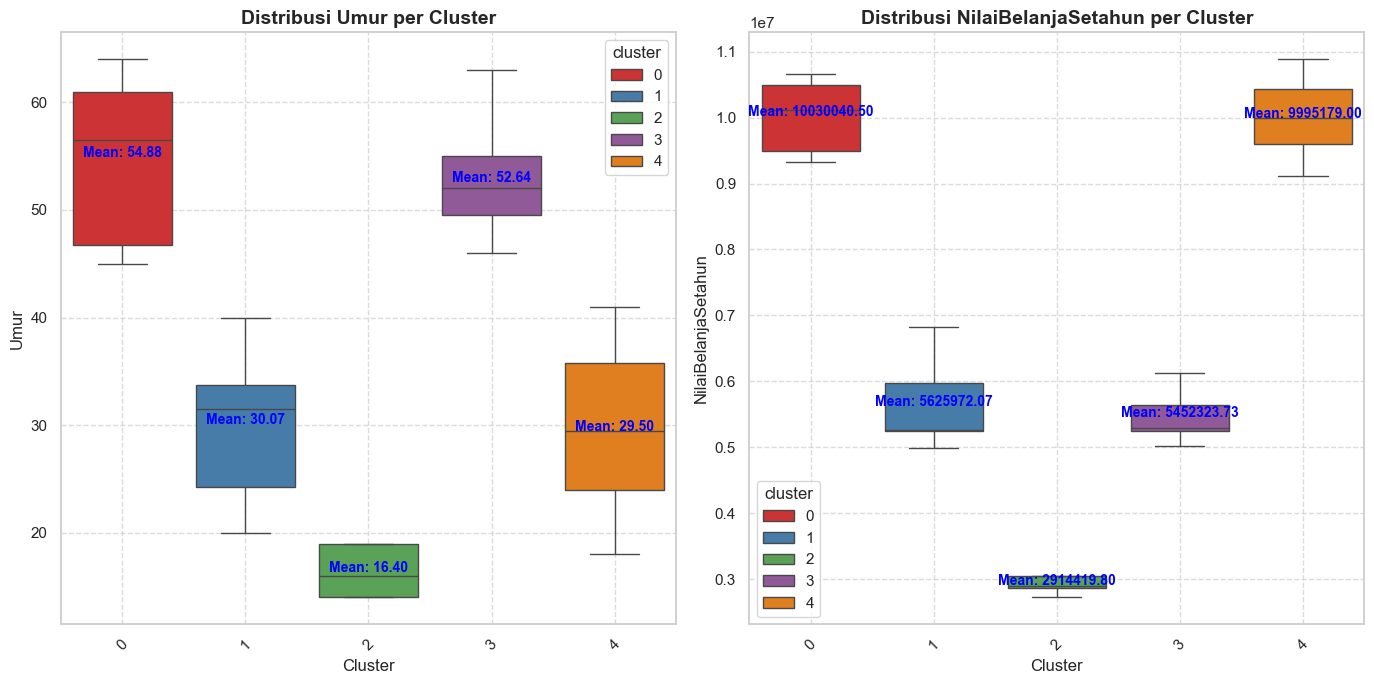

In [13]:
# Visualisasi hasil clustering
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
kolom_numerik = ['Umur', 'NilaiBelanjaSetahun']

# Membuat subplot
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Loop untuk setiap kolom numerik
for kolom in kolom_numerik:
    # Plot boxplot dengan warna yang berbeda untuk setiap cluster
    sns.boxplot(x='cluster', y=kolom, data=df_final, ax=axs[kolom_numerik.index(kolom)], hue="cluster", palette='Set1')
    
    # Menambahkan judul dan label
    axs[kolom_numerik.index(kolom)].set_title(f'Distribusi {kolom} per Cluster', fontsize=14, fontweight='bold')
    axs[kolom_numerik.index(kolom)].set_xlabel('Cluster', fontsize=12)
    axs[kolom_numerik.index(kolom)].set_ylabel(kolom, fontsize=12)
    
    # Menambahkan grid untuk memudahkan pembacaan
    axs[kolom_numerik.index(kolom)].grid(True, linestyle='--', alpha=0.7)
    
    # Rotasi label sumbu x jika diperlukan
    axs[kolom_numerik.index(kolom)].tick_params(axis='x', rotation=45)
    
    # Menambahkan informasi statistik (median) di atas boxplot
    means = df_final.groupby('cluster')[kolom].mean()
    for i, mean in enumerate(means):
        axs[kolom_numerik.index(kolom)].text(i, mean, f'Mean: {mean:.2f}', 
                                            horizontalalignment='center', 
                                            fontsize=10, color='blue', fontweight='bold')

# Menampilkan plot
plt.tight_layout()
plt.show()

<h3>Ringkasan Hasil Visualisasi Data Numerik Untuk Setiap Cluster</h3>
<ol>
  <li>Distribusi Data Umur</li>
  <ul>
    <li>Distribusi Data Umur Terbagi <strong>3 Domain</strong></li>
    <ol>
      <li><strong>Young</strong> : Mean = 16,40 Tahun</li>
      <li><strong>Adult</strong> : Mean = 29,50 Tahun & Mean = 30,07 Tahun</li>
      <li><strong>Senior</strong> : Mean = 52,64 Tahun & Mean = 54,88 Tahun</li>
    </ol>
  </ul>
  <li>Distribusi Nilai Belanja Setahun</li>
  <ul>
    <li>Distribusi Nilai Belanja Setahun <strong>3 Domain</strong></li>
    <ol>
      <li><strong>Silver</strong> : Mean = 2.914.419,8</li>
      <li><strong>Gold</strong> : Mean = 5.452.323,73 & Mean = 5.625.972,07</li>
      <li><strong>Diamond</strong> : Mean = 9.995.179,00 & Mean = 10.030.040,50</li>
    </ol>
  </ul>
</ol>
<h4>=============================================================================</h4>
<ol>
  <li>Distribusi Data Umur Berdasarkan <strong>Cluster</strong></li>
  <ul>
    <li>Distribusi Data Umur Jika dibagi Berdasarkan <strong>5 Cluster</strong></li>
    <ol>
      <li><strong>Cluster 0</strong> : Umur ---> Domain <strong>Senior</strong></li>
      <li><strong>Cluster 1</strong> : Umur ---> Domain <strong>Adult</strong></li>
      <li><strong>Cluster 2</strong> : Umur ---> Domain <strong>Young</strong></li>
      <li><strong>Cluster 3</strong> : Umur ---> Domain <strong>Senior</strong></li>
      <li><strong>Cluster 4</strong> : Umur ---> Domain <strong>Adult</strong></li>
    </ol>
  </ul>
<li>Distribusi Data Nilai Belanja Setahun Berdasarkan <strong>Cluster</strong></li>
  <ul>
    <li>Distribusi Data Nilai Belanja Setahun Jika dibagi Berdasarkan <strong>5 Cluster</strong></li>
    <ol>
      <li><strong>Cluster 0</strong> : Nilai Belanja Setahun ---> Domain <strong>Diamond</strong></li>
      <li><strong>Cluster 1</strong> : Nilai Belanja Setahun ---> Domain <strong>Gold</strong></li>
      <li><strong>Cluster 2</strong> : Nilai Belanja Setahun ---> Domain <strong>Silver</strong></li>
      <li><strong>Cluster 3</strong> : Nilai Belanja Setahun ---> Domain <strong>Gold</strong></li>
      <li><strong>Cluster 4</strong> : Nilai Belanja Setahun ---> Domain <strong>Diamond</strong></li>
    </ol>
  </ul>
</ol>

<h2>18. Visualisasi Hasil Clustering Data Kategorikal</h2>

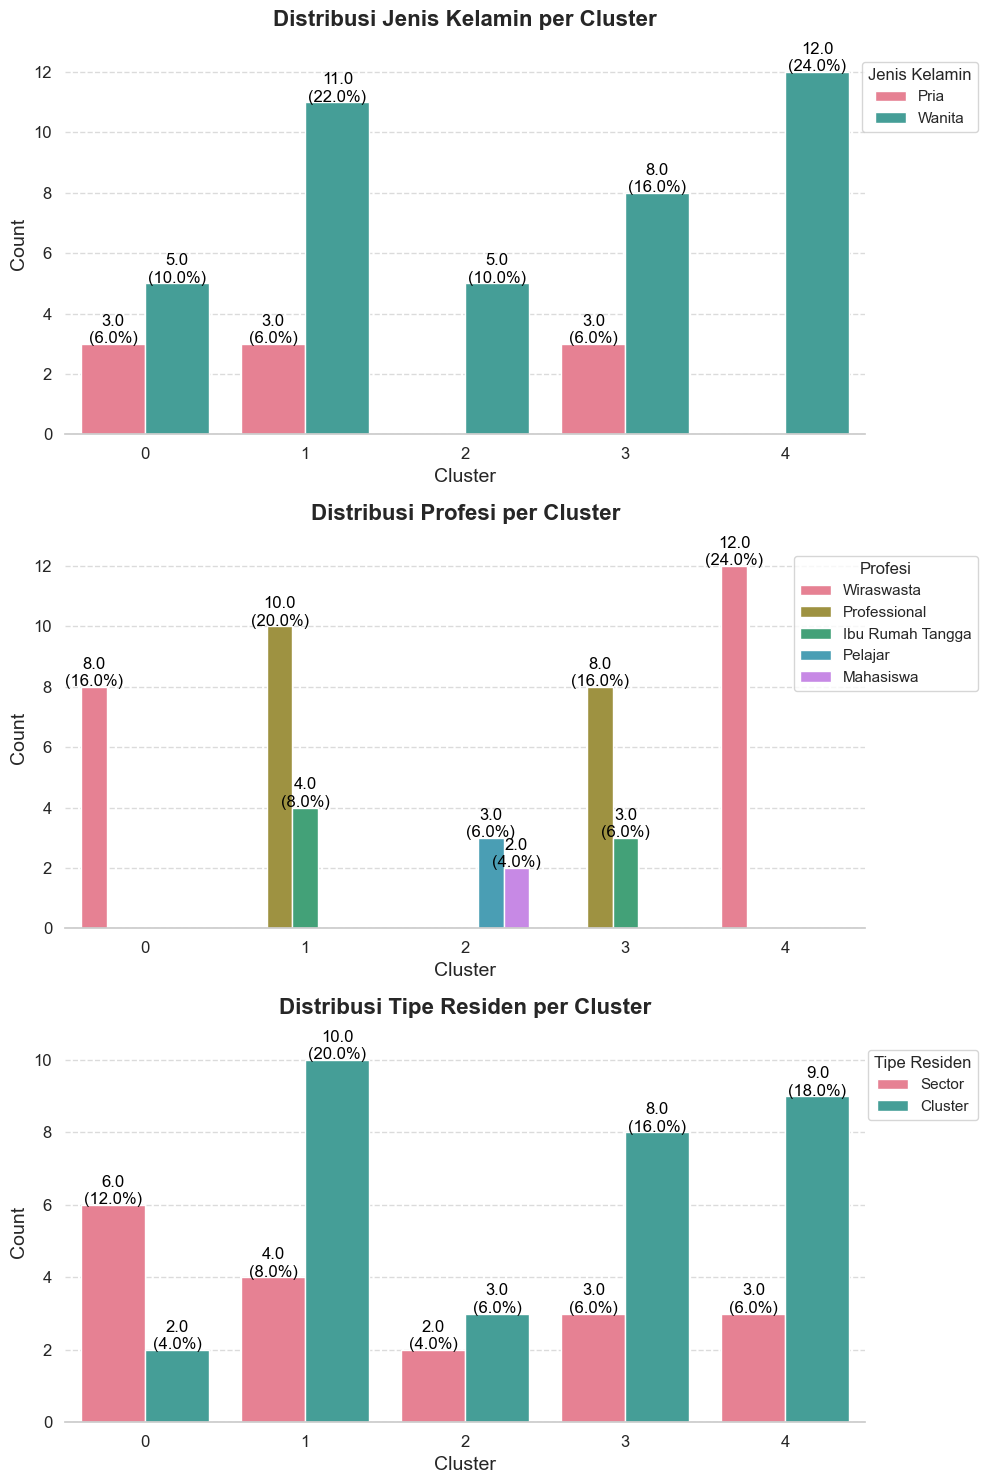

In [14]:
# Membuat Variable Kolom Kategorikal
kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']

# Membuat Variable Kolom Kategorikal
kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']

# Membuat Canvas & Visualisasi Menggunakan Countplot
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Warna yang lebih menarik
# palette = sns.color_palette("husl", len(df_final['cluster'].unique()))

for kolom in kolom_kategorikal:
    sns.countplot(data=df_final, x='cluster', hue=kolom, ax=axs[kolom_kategorikal.index(kolom)], palette="husl")
    axs[kolom_kategorikal.index(kolom)].set_title(f'Distribusi {kolom} per Cluster', fontsize=16, fontweight='bold', pad=20)
    axs[kolom_kategorikal.index(kolom)].set_xlabel('Cluster', fontsize=14)
    axs[kolom_kategorikal.index(kolom)].set_ylabel('Count', fontsize=14)
    axs[kolom_kategorikal.index(kolom)].grid(axis='y', linestyle='--', alpha=0.7)
    axs[kolom_kategorikal.index(kolom)].legend(title=kolom, title_fontsize='12', loc='upper right', bbox_to_anchor=(1.15, 1))
    axs[kolom_kategorikal.index(kolom)].tick_params(axis='x', labelsize=12, rotation=0)
    axs[kolom_kategorikal.index(kolom)].tick_params(axis='y', labelsize=12)
    
    # Menambahkan anotasi dengan persentase, kecuali jika height = 0
    total = len(df_final)
    for p in axs[kolom_kategorikal.index(kolom)].patches:
        height = p.get_height()
        if height != 0:  # Hanya menambahkan anotasi jika height tidak 0
            axs[kolom_kategorikal.index(kolom)].annotate(
                f'{height}\n({height/total:.1%})',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black'
            )
    
    sns.despine(right=True, top=True, left=True)

plt.tight_layout()
plt.show()


<h3>Ringkasan Hasil Visualisasi Data Kategorikal Untuk Setiap Cluster</h3>
<ol>
  <li>Distribusi Data Jenis Kelamin</li>
  <ul>
    <li>Distribusi Data Jenis Kelamin pada <strong>5 Cluster</strong></li>
    <ol>
      <li><strong>Cluster 0</strong> : Pria&Wanita</li>
      <li><strong>Cluster 1</strong> : Pria&Wanita</li>
      <li><strong>Cluster 2</strong> : Wanita</li>
      <li><strong>Cluster 3</strong> : Pria&Wanita</li>
      <li><strong>Cluster 4</strong> : Wanita</li>
    </ol>
  </ul>
  <li>Distribusi Data Profesi</li>
  <ul>
    <li>Distribusi Data Profesi pada <strong>5 Cluster</strong></li>
    <ol>
      <li><strong>Cluster 0</strong> : Wiraswasta</li>
      <li><strong>Cluster 1</strong> : Professional&Ibu Rumah Tangga</li>
      <li><strong>Cluster 2</strong> : Pelajar&Mahasiswa</li>
      <li><strong>Cluster 3</strong> : Professional&Ibu Rumah Tangga</li>
      <li><strong>Cluster 4</strong> : Wiraswasta</li>
    </ol>
  </ul>
  <li>Distribusi Data Tipe Residen</li>
  <ul>
    <li>Distribusi Data Tipe Residen pada <strong>5 Cluster</strong></li>
    <ol>
      <li><strong>Cluster 0</strong> : Sector&Cluster</li>
      <li><strong>Cluster 1</strong> : Sector&Cluster</li>
      <li><strong>Cluster 2</strong> : Sector&Cluster</li>
      <li><strong>Cluster 3</strong> : Sector&Cluster</li>
      <li><strong>Cluster 4</strong> : Sector&Cluster</li>
    </ol>
  </ul>
  <li><strong>Kesimpulan</strong></li>
  <ul>
    <li>Distribusi Data Jenis Kelamin <strong>Tidak Dijadikan Variabel</strong> untuk Penamaan Setiap CLuster karena distribusi data jenis kelamin terdapat pada semua cluster</li>
    <li>Distribusi Data Profesi <strong>Dijadikan Variabel</strong> untuk Penamaan Setiap CLuster karena distribusi data Profesi memiliki ke unikan untuk setiap cluster</li>
    <li>Distribusi Data Tipe Residen<strong>Tidak Dijadikan Variabel</strong> untuk Penamaan Setiap CLuster karena distribusi data Tipe Residen terdapat pada semua cluster</li>
  </ul>
</ol>

<h2>19. Menamakan Cluster</h2>
<ul>
  <li>Menamakan Cluster Berdasarkan Ringkasan Visualisasi Data Numerik & Data Kategorikal</li>
    <ol>
      <li><strong>Cluster 0</strong> : Diamond Senior Enterpreneur Member</li>
      <li><strong>Cluster 1</strong> : Gold Adults Freelance Member</li>
      <li><strong>Cluster 2</strong> : Silver Young Student Member</li>
      <li><strong>Cluster 3</strong> : Gold Senior Freelance Member</li>
      <li><strong>Cluster 4</strong> : Diamond Adults Enterpreneur Member</li>
    </ol>
</ul>

In [15]:
# Menampilkan 5 Data Teratas
print(f"Menampilkan 5 Data Teratas : \n")
display(df_final.head())

# Menamakan Cluster
df_final['segmen'] = df_final['cluster'].map({
    0: 'Diamond Senior Enterpreneur Member',
    1: 'Gold Adults Freelance Member',
    2: 'Silver Young Student Member',
    3: 'Gold Senior Freelance Member',
    4: 'Diamond Adults Enterpreneur Member'
})

# Menampilkan 5 Data Teratas
print(f"Menampilkan 5 Data Teratas : \n")
display(df_final.head())

# Manampilkan informasi dataset
print(f"Informasi Dataset : \n")
print(df_final.info())

Menampilkan 5 Data Teratas : 



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,0
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,3
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,3
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,4


Menampilkan 5 Data Teratas : 



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,0,Diamond Senior Enterpreneur Member
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2,Silver Young Student Member
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,3,Gold Senior Freelance Member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,3,Gold Senior Freelance Member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,4,Diamond Adults Enterpreneur Member


Informasi Dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.4+ KB
None


<h2>20. Kesimpulan Data Science in Marketing: Customer Segmentation with Python</h2>
<ol>
  <li><strong>Cluster 0</strong> : Cluster Diamond Senior Enterpreneur Member berisi pelanggan dengan profesi <strong>Wiraswasta</strong>, rata rata usia <strong>52 - 54</strong> tahun serta rata - rata Nilai Belanja Setahun <strong>9 - 10</strong> juta</li>
  <li><strong>Cluster 1</strong> : Cluster Gold Adults Freelance Member berisi pelanggan dengan profesi <strong>Professional & IRT</strong>, rata rata usia <strong>29 - 30</strong> tahun serta rata - rata Nilai Belanja Setahun <strong>5</strong> juta</li>
  <li><strong>Cluster 2</strong> : Cluster Silver Young Student Member berisi pelanggan dengan profesi <strong>Pelajar & Mahasiswa</strong>, rata rata usia <strong>16</strong> tahun serta rata - rata Nilai Belanja Setahun <strong>3</strong> juta</li>
  <li><strong>Cluster 3</strong> : Cluster Gold Senior Freelance Member berisi pelanggan dengan profesi <strong>Professional & IRT</strong>, rata rata usia <strong>52 - 54</strong> tahun serta rata - rata Nilai Belanja Setahun <strong>5</strong> juta</li>
  <li><strong>Cluster 4</strong> : Cluster Diamond Adults Enterpreneur Member berisi pelanggan dengan profesi <strong>Wiraswasta</strong>, rata rata usia <strong>30</strong> tahun serta rata - rata Nilai Belanja Setahun <strong>10</strong> juta</li>
</ol>
<h4>=====================================================================================================================================</h4>
<ul>
  <h3><strong>Tips !!!</strong></h3>
  <li>Penentuan jumlah cluster yang optimal bisa menggunakan matrix evaluasi sebagi berikut :</li>
    <ol>
      <li>Elbow Method</li>
      <li>Sillhoute Score</li>
      <li>Callinski-Harabaz Score</li>
    </ol>
  <li>Penentuan jumlah cluster yang optimal memerlukan <strong>Masuk dari TIM</strong></li>
  <li>Tantangan lainnya adalah semakin banyak jumlah dataset akan semakin lama dalam proses penentuan jumlah cluster</li>
</ul>

<h2>Pendahuluan: Penggunaan Model Untuk Data Baru</h2>

<h2>21. Mempersiapkan Data Baru</h2>

In [17]:
# Data Baru
data = [{
  "Customer_ID": "CUST-100",
  "Nama Pelanggan": "Joko",
  "Jenis Kelamin": "Pria",
  "Umur": 45,
  "Profesi": "Wiraswasta",
  "Tipe Residen": "Cluster",
  "NilaiBelanjaSetahun": 8230000
}]

# Membuat Dataframe Baru
new_df = pd.DataFrame(data)

# Melihat Data Baru
print(f"Data Baru : \n")
display(new_df)

Data Baru : 



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000


<h2>22. Membuat Fungsi Data Pemrosesan</h2>

In [28]:
# Membuat fungsi data_preprocess
def data_preprocess(data):
  # Kolom Kategorikal
  kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']
  
  # Kolom Numerik
  kolom_numerik = ['Umur', 'NilaiBelanjaSetahun']

  # Konversi Kolom Kategorikal
  data_encode = data[kolom_kategorikal].copy()
  # Jenis Kelamin
  data_encode['Jenis Kelamin'] = data_encode['Jenis Kelamin'].map({
      'Pria': 0,
      'Wanita': 1
  })
  # Professi
  data_encode['Profesi'] = data_encode['Profesi'].map({
      'Ibu Rumah Tangga': 0,
      'Mahasiswa': 1,
      'Pelajar': 2,
      'Professional': 3,
      'Wiraswasta': 4
  })
  # Tipe Residen
  data_encode['Tipe Residen'] = data_encode['Tipe Residen'].map({
      'Cluster': 0,
      'Sector': 1
  })

  # Standardisasi Kolom Numerik
  data_std = data[kolom_numerik].copy()
  # Standaisasi Kolom Umur
  data_std['Umur'] = (data_std['Umur'] - 37.5) / 14.7
  # Standarisasi Kolom Nilai Belanja Setahun
  data_std['NilaiBelanjaSetahun'] = (data_std['NilaiBelanjaSetahun'] - 7069874.8) / 2590619.0

  # Menggabungkan Data
  data_model = pd.concat([data_encode, data_std], axis=1)

  # Return data_model
  return data_model

# Menjalankan fungsi data_preprocess
data_baru = data_preprocess(new_df)

# Menampilkan Data Baru
print(f"Data Baru Setelah Dipreprocess : \n")
display(data_baru)

Data Baru Setelah Dipreprocess : 



,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,0,0.510204,0.447818


<h2>23. Memanggil Model & Melakukan Prediksi</h2>

In [29]:
# Membuat Fungsi Modelling
def modelling(data):
  # Load Model
  model = pickle.load(open('cluster_model.pkl', 'rb'))

  # Melakukan Prediksi
  clusters = model.predict(data, categorical=[0, 1, 2])

  # Return Clusters
  return clusters

# Menjalankan Fungsi Modelling
clusters = modelling(data_baru)

# Menampilkan hasil modelling
print(f"Hasil Prediksi Clustering : {clusters[0]}")
print(clusters)

Hasil Prediksi Clustering : 0
[0]


<h2>24. Menamakan Segmen</h2>

In [30]:
# Membuat Fungsi Menamakan Segmen
def menamakan_segmen(data_asli, clusters):

  # Menggabungkan Cluster dan Data Asli
  data_final = data_asli.copy()
  # Menamakan Cluster
  data_final['cluster'] = clusters

  # Mapping Segmen
  data_final['segmen'] = data_final['cluster'].map({
      0: 'Diamond Senior Enterpreneur Member',
      1: 'Gold Adults Freelance Member',
      2: 'Silver Young Student Member',
      3: 'Gold Senior Freelance Member',
      4: 'Diamond Adults Enterpreneur Member'
  })

  # Return data_asli
  return data_final

# Menjalankan Fungsi Menamakan Segmen
data_baru_dengan_segmen = menamakan_segmen(new_df, clusters)

# Menampilkan Data Baru dengan Segmen
print(f"Data Baru dengan Segmen : \n")
display(data_baru_dengan_segmen)

Data Baru dengan Segmen : 



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,cluster,segmen
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000,0,Diamond Senior Enterpreneur Member
